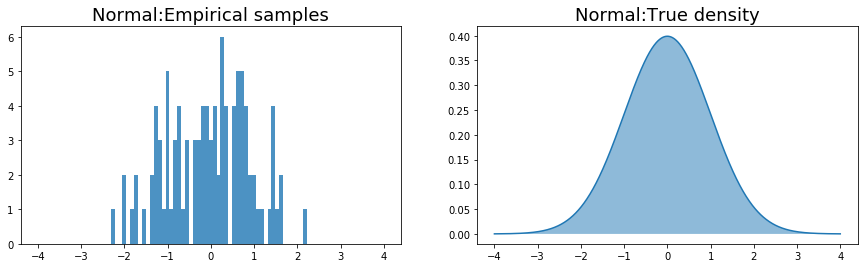

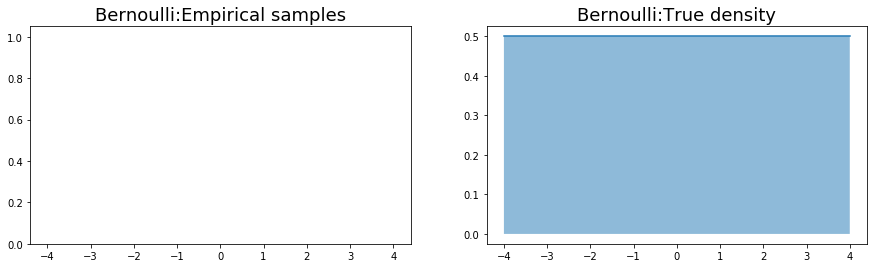

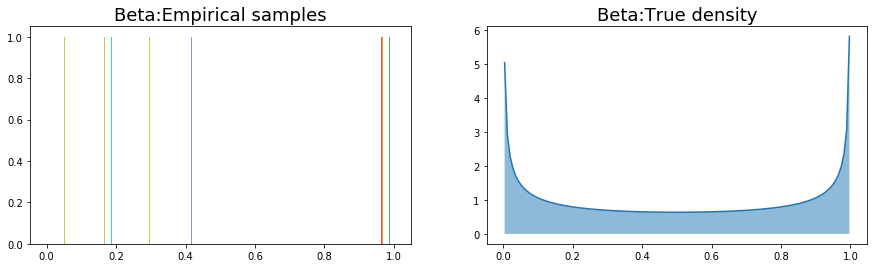

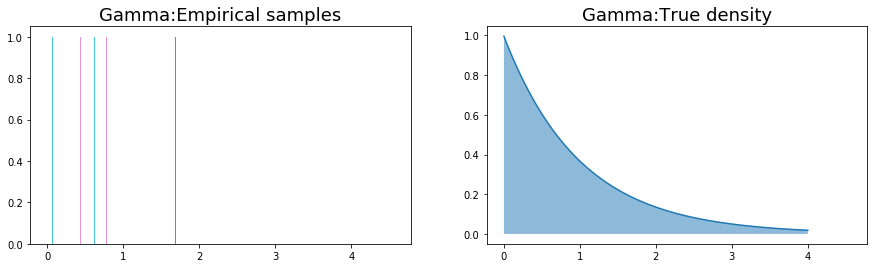

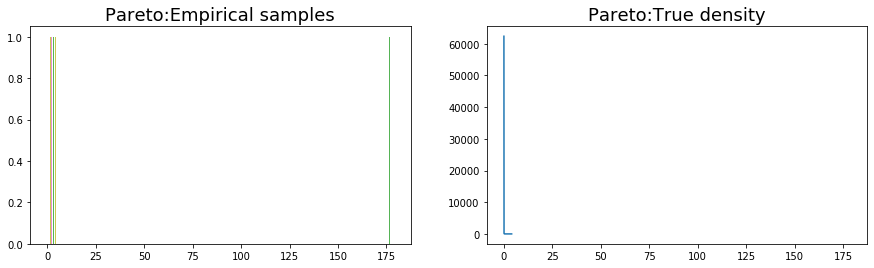

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as distrib
import torch.distributions.transforms as transform
# Imports for plotting
import numpy as np
import matplotlib.pyplot as plt
# Define grids of points (for later plots)
x = np.linspace(-4, 4, 1000)
z = np.array(np.meshgrid(x, x)).transpose(1, 2, 0)
z = np.reshape(z, [z.shape[0] * z.shape[1], -1])

p = {
    'Normal': distrib.Normal(loc=0, scale=1),
    'Bernoulli': distrib.Bernoulli(probs=torch.tensor([0.5])),
    'Beta': distrib.Beta(concentration1=torch.tensor([0.5]), concentration0=torch.tensor([0.5])),
    'Gamma': distrib.Gamma(concentration=torch.tensor([1.0]), rate=torch.tensor([1.0])),
    'Pareto': distrib.Pareto(alpha=torch.tensor([1.0]), scale=torch.tensor([1.0])),
}

for name, n in p.items():
    # Obtain some samples
    samples = n.sample((100, ))
    # Evaluate true density at given points
    density = torch.exp(n.log_prob(torch.Tensor(x))).numpy()
    # Plot both samples and density
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(15, 4))
    ax1.hist(samples, 50, alpha=0.8);
    ax1.set_title('{}:Empirical samples'.format(name), fontsize=18);
    ax2.plot(x, density); ax2.fill_between(x, density, 0, alpha=0.5)
    ax2.set_title('{}:True density'.format(name), fontsize=18);
    plt.show()